In [1]:
import numpy as np
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.key():
            params[key] -= -self.lr * grads[key]

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9): # コンストラクタ（クラスが作られたときに最初に呼ばれる特別な関数）
        self.lr = lr # lr → 学習率（Learning Rate）、1回の更新でどれくらいパラメータを動かすかを決める値
        self.momentum = momentum # momentum → モメンタム係数、前回の更新の勢いをどれくらい引き継ぐかを決める値
        self.v = None # 更新の「速度（v）」を保存するための変数を初期化
        # self.xxx : このクラスのどの関数からもアクセスできるようになる

    def update(self, params, grads):
        if self.v is None:
            self.v = {} # 速度 v を保存するための空の辞書（key-value のペア）を作る
            for key, val in params.items(): # パラメータの辞書 params のすべての要素を取り出してループする
                # key → パラメータの名前（例: 'W1', 'b1'） val → パラメータの値（実際の配列や数値）
                self.v[key] = np.zeros_like(val) # 速度 v の各パラメータをゼロで初期化。np.zeros_like(val) は val と同じ形のゼロ配列を作る関数

        for key in params.keys(): # パラメータの各キーについて、更新計算を行うループ
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            # self.momentum * self.v[key] → 前回の速度の勢いを残す
            # - self.lr * grads[key] → 今回の勾配に基づく更新方向
            # 足すと、前回の勢い＋今回の更新方向が合わさった「新しい速度」になる
            params[key] += self.v[key] # 計算した速度分だけパラメータを更新

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, var in params.items():
                self.h[key] = np.zeros_like(var)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 1e-7 : self.h[key]=0の場合に、0で除算することを防ぐ

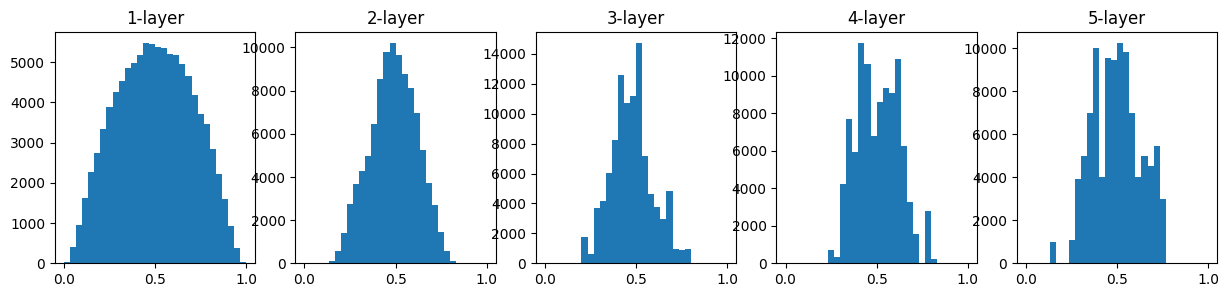

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 標準正規分布に従う乱数 を 1000行 × 100列生成。1000:サンプル数、100:特徴量
node_num = 100 # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5
activations = {} # アクティベーション（各層の出力）結果を格納する辞書を初期化

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 重みwの初期値を変えてみる
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01 # std=0.01(標準偏差が0.01のガウス分布）
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num) # Xavierの初期値
    
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

plt.figure(figsize=(15, 3))  # 横幅を広くして見やすくする
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

============== 1/16 ==============
epoch:0 | 0.117 - 0.099
epoch:1 | 0.097 - 0.103
epoch:2 | 0.097 - 0.133
epoch:3 | 0.097 - 0.142
epoch:4 | 0.097 - 0.169
epoch:5 | 0.097 - 0.188
epoch:6 | 0.097 - 0.207
epoch:7 | 0.097 - 0.229
epoch:8 | 0.097 - 0.253
epoch:9 | 0.097 - 0.265
epoch:10 | 0.097 - 0.278
epoch:11 | 0.097 - 0.305
epoch:12 | 0.097 - 0.323
epoch:13 | 0.097 - 0.336
epoch:14 | 0.097 - 0.358
epoch:15 | 0.097 - 0.37
epoch:16 | 0.097 - 0.381
epoch:17 | 0.097 - 0.406
epoch:18 | 0.097 - 0.406


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.425
============== 2/16 ==============
epoch:0 | 0.099 - 0.096
epoch:1 | 0.097 - 0.114
epoch:2 | 0.097 - 0.122
epoch:3 | 0.097 - 0.14
epoch:4 | 0.097 - 0.171
epoch:5 | 0.097 - 0.194
epoch:6 | 0.097 - 0.223
epoch:7 | 0.097 - 0.249
epoch:8 | 0.097 - 0.266
epoch:9 | 0.097 - 0.286
epoch:10 | 0.097 - 0.301
epoch:11 | 0.097 - 0.326
epoch:12 | 0.097 - 0.349
epoch:13 | 0.097 - 0.374
epoch:14 | 0.097 - 0.394
epoch:15 | 0.097 - 0.407
epoch:16 | 0.097 - 0.432
epoch:17 | 0.097 - 0.44
epoch:18 | 0.097 - 0.464


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.483
============== 3/16 ==============
epoch:0 | 0.157 - 0.074
epoch:1 | 0.381 - 0.121
epoch:2 | 0.534 - 0.175
epoch:3 | 0.641 - 0.184
epoch:4 | 0.709 - 0.222
epoch:5 | 0.758 - 0.249
epoch:6 | 0.802 - 0.289
epoch:7 | 0.86 - 0.328
epoch:8 | 0.889 - 0.36
epoch:9 | 0.903 - 0.398
epoch:10 | 0.933 - 0.442
epoch:11 | 0.948 - 0.458
epoch:12 | 0.959 - 0.495
epoch:13 | 0.972 - 0.518
epoch:14 | 0.98 - 0.532
epoch:15 | 0.986 - 0.568
epoch:16 | 0.986 - 0.585
epoch:17 | 0.991 - 0.611
epoch:18 | 0.991 - 0.615


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.993 - 0.644
============== 4/16 ==============
epoch:0 | 0.107 - 0.094
epoch:1 | 0.297 - 0.138
epoch:2 | 0.416 - 0.212
epoch:3 | 0.496 - 0.289
epoch:4 | 0.573 - 0.351
epoch:5 | 0.644 - 0.398
epoch:6 | 0.674 - 0.456
epoch:7 | 0.693 - 0.5
epoch:8 | 0.744 - 0.547
epoch:9 | 0.76 - 0.59
epoch:10 | 0.79 - 0.621
epoch:11 | 0.8 - 0.649
epoch:12 | 0.815 - 0.678
epoch:13 | 0.818 - 0.693
epoch:14 | 0.825 - 0.719
epoch:15 | 0.851 - 0.742
epoch:16 | 0.856 - 0.753
epoch:17 | 0.875 - 0.775
epoch:18 | 0.88 - 0.786


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.891 - 0.797
============== 5/16 ==============
epoch:0 | 0.095 - 0.113
epoch:1 | 0.095 - 0.136
epoch:2 | 0.096 - 0.256
epoch:3 | 0.095 - 0.383
epoch:4 | 0.096 - 0.482
epoch:5 | 0.097 - 0.554
epoch:6 | 0.097 - 0.63
epoch:7 | 0.098 - 0.671
epoch:8 | 0.099 - 0.704
epoch:9 | 0.1 - 0.728
epoch:10 | 0.101 - 0.753
epoch:11 | 0.102 - 0.772
epoch:12 | 0.106 - 0.797
epoch:13 | 0.108 - 0.813
epoch:14 | 0.117 - 0.822
epoch:15 | 0.122 - 0.833
epoch:16 | 0.137 - 0.842
epoch:17 | 0.144 - 0.85
epoch:18 | 0.153 - 0.864


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.162 - 0.867
============== 6/16 ==============
epoch:0 | 0.08 - 0.121
epoch:1 | 0.124 - 0.196
epoch:2 | 0.116 - 0.411
epoch:3 | 0.081 - 0.559
epoch:4 | 0.099 - 0.644
epoch:5 | 0.116 - 0.707
epoch:6 | 0.116 - 0.734
epoch:7 | 0.116 - 0.762
epoch:8 | 0.116 - 0.798
epoch:9 | 0.116 - 0.813
epoch:10 | 0.116 - 0.836
epoch:11 | 0.116 - 0.842
epoch:12 | 0.116 - 0.86
epoch:13 | 0.116 - 0.875
epoch:14 | 0.116 - 0.889
epoch:15 | 0.116 - 0.894
epoch:16 | 0.116 - 0.904
epoch:17 | 0.116 - 0.911
epoch:18 | 0.122 - 0.916


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.126 - 0.925
============== 7/16 ==============
epoch:0 | 0.116 - 0.089
epoch:1 | 0.116 - 0.226
epoch:2 | 0.116 - 0.542
epoch:3 | 0.116 - 0.724
epoch:4 | 0.116 - 0.79
epoch:5 | 0.116 - 0.82
epoch:6 | 0.117 - 0.848
epoch:7 | 0.117 - 0.861
epoch:8 | 0.117 - 0.88
epoch:9 | 0.117 - 0.905
epoch:10 | 0.117 - 0.924
epoch:11 | 0.116 - 0.944
epoch:12 | 0.116 - 0.955
epoch:13 | 0.116 - 0.962
epoch:14 | 0.116 - 0.969
epoch:15 | 0.116 - 0.974
epoch:16 | 0.116 - 0.981
epoch:17 | 0.116 - 0.987
epoch:18 | 0.116 - 0.993


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.994
============== 8/16 ==============
epoch:0 | 0.105 - 0.127
epoch:1 | 0.105 - 0.48
epoch:2 | 0.117 - 0.67
epoch:3 | 0.117 - 0.755
epoch:4 | 0.116 - 0.825
epoch:5 | 0.117 - 0.872
epoch:6 | 0.117 - 0.907
epoch:7 | 0.117 - 0.941
epoch:8 | 0.117 - 0.964
epoch:9 | 0.117 - 0.97
epoch:10 | 0.117 - 0.981
epoch:11 | 0.117 - 0.988
epoch:12 | 0.117 - 0.99
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.997


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.117 - 0.122
epoch:1 | 0.117 - 0.387
epoch:2 | 0.116 - 0.733
epoch:3 | 0.117 - 0.83
epoch:4 | 0.117 - 0.858
epoch:5 | 0.116 - 0.902
epoch:6 | 0.116 - 0.939
epoch:7 | 0.116 - 0.969
epoch:8 | 0.117 - 0.979
epoch:9 | 0.116 - 0.986
epoch:10 | 0.116 - 0.989
epoch:11 | 0.116 - 0.996
epoch:12 | 0.116 - 0.997
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.999
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.998
============== 10/16 ==============
epoch:0 | 0.097 - 0.146
epoch:1 | 0.116 - 0.509
epoch:2 | 0.116 - 0.75
epoch:3 | 0.117 - 0.831
epoch:4 | 0.117 - 0.849
epoch:5 | 0.117 - 0.862
epoch:6 | 0.117 - 0.878
epoch:7 | 0.116 - 0.88
epoch:8 | 0.116 - 0.892
epoch:9 | 0.116 - 0.904
epoch:10 | 0.116 - 0.907
epoch:11 | 0.116 - 0.907
epoch:12 | 0.116 - 0.926
epoch:13 | 0.116 - 0.984
epoch:14 | 0.116 - 0.998
epoch:15 | 0.116 - 0.998
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 1.0
============== 11/16 ==============
epoch:0 | 0.116 - 0.146
epoch:1 | 0.117 - 0.638
epoch:2 | 0.117 - 0.65
epoch:3 | 0.117 - 0.739
epoch:4 | 0.117 - 0.762
epoch:5 | 0.117 - 0.719
epoch:6 | 0.117 - 0.776
epoch:7 | 0.117 - 0.756
epoch:8 | 0.117 - 0.792
epoch:9 | 0.117 - 0.796
epoch:10 | 0.117 - 0.886
epoch:11 | 0.117 - 0.881
epoch:12 | 0.117 - 0.889
epoch:13 | 0.117 - 0.895
epoch:14 | 0.117 - 0.874
epoch:15 | 0.117 - 0.886
epoch:16 | 0.117 - 0.897
epoch:17 | 0.117 - 0.899
epoch:18 | 0.117 - 0.899


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.899
============== 12/16 ==============
epoch:0 | 0.087 - 0.29
epoch:1 | 0.117 - 0.481
epoch:2 | 0.099 - 0.529
epoch:3 | 0.099 - 0.737
epoch:4 | 0.099 - 0.643
epoch:5 | 0.116 - 0.76
epoch:6 | 0.116 - 0.797
epoch:7 | 0.117 - 0.828
epoch:8 | 0.116 - 0.795
epoch:9 | 0.117 - 0.795
epoch:10 | 0.117 - 0.818
epoch:11 | 0.117 - 0.895
epoch:12 | 0.117 - 0.89
epoch:13 | 0.117 - 0.893
epoch:14 | 0.117 - 0.899
epoch:15 | 0.117 - 0.957
epoch:16 | 0.116 - 0.952
epoch:17 | 0.117 - 0.964
epoch:18 | 0.117 - 0.963


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.973
============== 13/16 ==============
epoch:0 | 0.116 - 0.263
epoch:1 | 0.116 - 0.355
epoch:2 | 0.116 - 0.523
epoch:3 | 0.117 - 0.534
epoch:4 | 0.116 - 0.573
epoch:5 | 0.117 - 0.584
epoch:6 | 0.117 - 0.606
epoch:7 | 0.116 - 0.626
epoch:8 | 0.117 - 0.658
epoch:9 | 0.117 - 0.635
epoch:10 | 0.117 - 0.716
epoch:11 | 0.117 - 0.713
epoch:12 | 0.117 - 0.754
epoch:13 | 0.117 - 0.754
epoch:14 | 0.117 - 0.704
epoch:15 | 0.117 - 0.78
epoch:16 | 0.116 - 0.791
epoch:17 | 0.116 - 0.788
epoch:18 | 0.116 - 0.794


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.786
============== 14/16 ==============
epoch:0 | 0.105 - 0.248
epoch:1 | 0.116 - 0.425
epoch:2 | 0.116 - 0.545
epoch:3 | 0.116 - 0.534
epoch:4 | 0.116 - 0.581
epoch:5 | 0.116 - 0.59
epoch:6 | 0.116 - 0.569
epoch:7 | 0.116 - 0.64
epoch:8 | 0.116 - 0.623
epoch:9 | 0.116 - 0.653
epoch:10 | 0.116 - 0.678
epoch:11 | 0.116 - 0.611
epoch:12 | 0.116 - 0.702
epoch:13 | 0.116 - 0.703
epoch:14 | 0.117 - 0.668
epoch:15 | 0.116 - 0.702
epoch:16 | 0.116 - 0.689
epoch:17 | 0.116 - 0.687
epoch:18 | 0.116 - 0.697


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.668
============== 15/16 ==============
epoch:0 | 0.093 - 0.212
epoch:1 | 0.116 - 0.349
epoch:2 | 0.116 - 0.382
epoch:3 | 0.117 - 0.402
epoch:4 | 0.117 - 0.404
epoch:5 | 0.116 - 0.414
epoch:6 | 0.116 - 0.416
epoch:7 | 0.116 - 0.421
epoch:8 | 0.116 - 0.499
epoch:9 | 0.116 - 0.482
epoch:10 | 0.116 - 0.495
epoch:11 | 0.116 - 0.495
epoch:12 | 0.116 - 0.502
epoch:13 | 0.116 - 0.518
epoch:14 | 0.116 - 0.511
epoch:15 | 0.116 - 0.519
epoch:16 | 0.116 - 0.521
epoch:17 | 0.116 - 0.505
epoch:18 | 0.116 - 0.519


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.51
============== 16/16 ==============
epoch:0 | 0.099 - 0.104
epoch:1 | 0.117 - 0.195
epoch:2 | 0.117 - 0.311
epoch:3 | 0.117 - 0.37
epoch:4 | 0.117 - 0.395
epoch:5 | 0.117 - 0.396
epoch:6 | 0.117 - 0.484
epoch:7 | 0.117 - 0.506
epoch:8 | 0.117 - 0.506
epoch:9 | 0.117 - 0.46
epoch:10 | 0.117 - 0.507
epoch:11 | 0.117 - 0.494
epoch:12 | 0.117 - 0.512
epoch:13 | 0.117 - 0.5
epoch:14 | 0.117 - 0.508
epoch:15 | 0.117 - 0.516
epoch:16 | 0.117 - 0.51
epoch:17 | 0.117 - 0.513
epoch:18 | 0.117 - 0.512
epoch:19 | 0.117 - 0.513


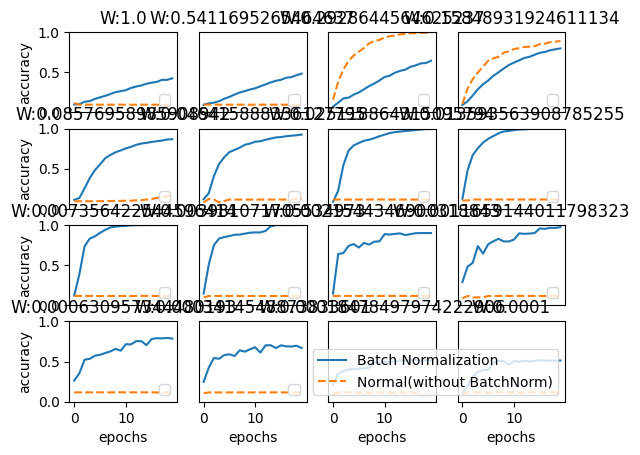

In [11]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True) # normalize=True → 画像の画素値を 0〜1 に正規化。

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20 # 最大学習回数（1 epoch = 1回全データを学習する）
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std): # 重みの初期化の標準偏差を変えて実験。初期化のスケールが学習に影響
    # bn(batch normalization)：バッチ正規化ネットワーク
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1) # 1 epoch あたりのミニバッチ反復回数
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size) #train_size（0~999)の範囲からランダムにbatch_size(100個)の整数が入った配列を作成
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network): # 2つのネットワークを順番に処理するループ
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.09666666666666666, test acc:0.1029
epoch:1, train acc:0.09333333333333334, test acc:0.1035
epoch:2, train acc:0.10333333333333333, test acc:0.1041
epoch:3, train acc:0.10333333333333333, test acc:0.1071
epoch:4, train acc:0.11, test acc:0.1154
epoch:5, train acc:0.14333333333333334, test acc:0.127
epoch:6, train acc:0.16, test acc:0.1361
epoch:7, train acc:0.18333333333333332, test acc:0.1445
epoch:8, train acc:0.23, test acc:0.1589
epoch:9, train acc:0.25666666666666665, test acc:0.1711
epoch:10, train acc:0.2633333333333333, test acc:0.1816
epoch:11, train acc:0.2833333333333333, test acc:0.19
epoch:12, train acc:0.31, test acc:0.196
epoch:13, train acc:0.3433333333333333, test acc:0.2052
epoch:14, train acc:0.37333333333333335, test acc:0.2202
epoch:15, train acc:0.38666666666666666, test acc:0.2401
epoch:16, train acc:0.41, test acc:0.251
epoch:17, train acc:0.42333333333333334, test acc:0.255
epoch:18, train acc:0.43, test acc:0.2631
epoch:19, train acc:0.4266

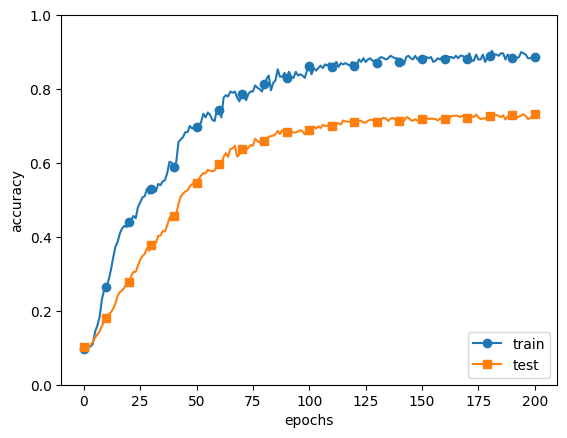

In [13]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [4]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio=dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            # xと同じ形状の乱数配列（0〜1の一様乱数）を生成し、ドロップアウト比より大きい値を True（生かす）とするマスク配列を作成。
            # dropout_ratio=0.5 の場合、約半分が False（ニューロンを落とす）、半分が True（ニューロンを残す）。
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask # マスク配列を使って、ニューロンをランダムに無効化
        else:
            return x * (1.0 - self.dropout_ratio) # 学習時と同じ出力スケールに合わせるために、1.0 - self.dropout_ratio＝生き残るニューロンの割合を乗じる

    def backward(self, dout):
        return dout * self.mask

train loss:2.3067778132384773
=== epoch:1, train acc:0.07666666666666666, test acc:0.09 ===
train loss:2.301153888360598
train loss:2.298782030719573
train loss:2.3200891112668116
=== epoch:2, train acc:0.07333333333333333, test acc:0.0925 ===
train loss:2.2860050577875874
train loss:2.312071928596434
train loss:2.3106429490017
=== epoch:3, train acc:0.08, test acc:0.0955 ===
train loss:2.3063705869726556
train loss:2.307489176521292
train loss:2.3131405448624496
=== epoch:4, train acc:0.08333333333333333, test acc:0.0979 ===
train loss:2.3177143171586176
train loss:2.310899412507079
train loss:2.3032020112426737
=== epoch:5, train acc:0.08333333333333333, test acc:0.1008 ===
train loss:2.3101897449682838
train loss:2.324493476767745
train loss:2.284842146380104
=== epoch:6, train acc:0.08333333333333333, test acc:0.1028 ===
train loss:2.297525721025856
train loss:2.3081971195462505
train loss:2.2995605016966145
=== epoch:7, train acc:0.07666666666666666, test acc:0.1076 ===
train loss

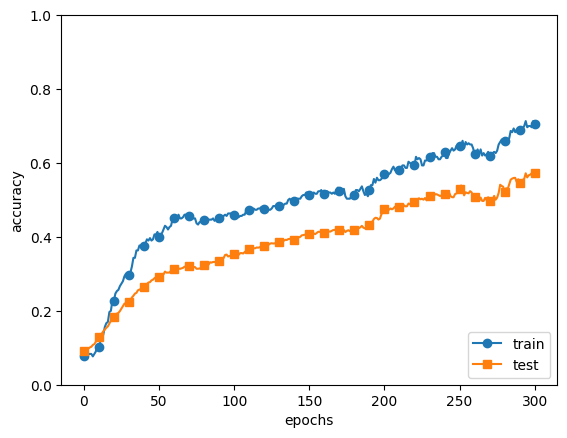

In [5]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [1]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 訓練データをシャッフル
x_train, t_train = shuffle_dataset(x_train, t_train)

# 検証データの分割
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


NameError: name 'load_mnist' is not defined

val acc:0.14 | lr:0.000272135918565221, weight decay:3.929617921445745e-07
val acc:0.13 | lr:1.6049605124901454e-06, weight decay:7.36517539107193e-08
val acc:0.72 | lr:0.00629285285522892, weight decay:4.916200598548647e-05
val acc:0.06 | lr:1.710249068738516e-06, weight decay:5.688307613321174e-08
val acc:0.17 | lr:4.074431644626886e-06, weight decay:3.744557231190957e-05
val acc:0.13 | lr:0.0006703539341444714, weight decay:1.94583116395826e-06
val acc:0.08 | lr:4.532401619301501e-06, weight decay:1.0734148905293563e-05
val acc:0.75 | lr:0.009114522877803283, weight decay:2.6012790010409376e-05
val acc:0.77 | lr:0.008333453781404194, weight decay:5.599243747028026e-06
val acc:0.08 | lr:0.00024581650011416714, weight decay:5.39109340505936e-08
val acc:0.13 | lr:7.17458776891495e-05, weight decay:7.5912827506968624e-06
val acc:0.12 | lr:5.561972896280314e-05, weight decay:4.25923600746866e-08
val acc:0.52 | lr:0.0040859344290119365, weight decay:2.0596501298782078e-06
val acc:0.09 | l

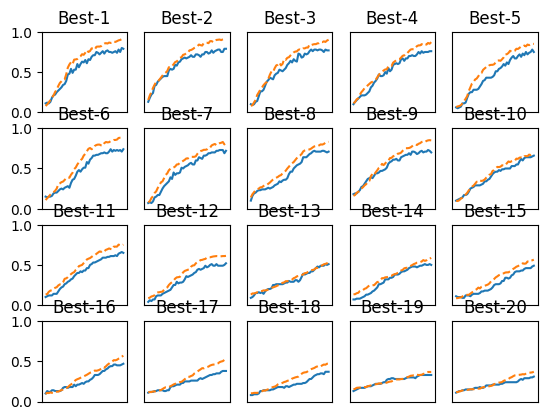

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()